Preprocessing Image.
1. Locate directories.
2. Loop through main directory.
3. Loop through each class.
4. Get image path for each class.

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

Reading CSV into a Dataframe

In [2]:
csv_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst-e_image_details.csv'
df = pd.read_csv(csv_path)
#Length Before data cleaning
print(f'Length before Data Cleaning: {len(df)}')

# Removing mp4 and dngs
df = df[~df["image_ID"].str.endswith((".mp4", ".dng"))]

#Length After data cleaning
print(f'Length after Data Cleaning: {len(df)}')

Length before Data Cleaning: 1546
Length after Data Cleaning: 1490


Testing on single image, resizing through keras

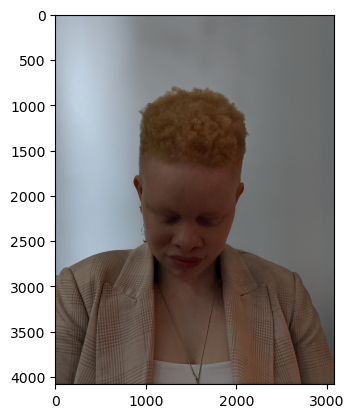

(3072, 4080)


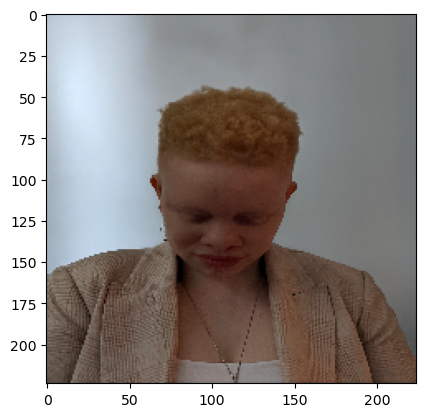

In [5]:
image_path = df['image_ID'] # 'image_ID' is the column name for image paths
folder_name = df['subject_name']  #  'subject_name' is the column name for folder names
lighting = df['lighting'] # 'lighting' is the column name for the extra feature
label = df['MST']  # 'MST' is the column name for labels
main_dir = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data'
full_image_path = os.path.join(main_dir,folder_name.iloc[0], image_path.iloc[0])

# Read the image using PIL or OpenCV
# image = cv2.imread(full_image_path)
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

img = tf.keras.utils.load_img(full_image_path)
plt.imshow(img)
plt.show()
print(img.size)

image_array = tf.keras.preprocessing.image.img_to_array(img) #Image to array
new_img = tf.image.resize(image_array, (224, 224)) #Resizing to Array
resized_img = tf.keras.preprocessing.image.array_to_img(new_img) #Resized array back to imagee
plt.imshow(resized_img)

# plt.imshow(image)


Testing on entire dataset using opencv

In [9]:
images =[]
labels =[]

# Function to resize images and save to a destination folder
def resize_and_save(input_folder, output_folder, df, target_size=(448, 448)):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    #Showing Progress bar
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing Images"):
        # Extract information from CSV
        folder_name = row['subject_name']
        image_name = row['image_ID']
        lighting = row['lighting'] 
        label = row['MST']

        # Build paths
        input_path = os.path.join(input_folder, folder_name, image_name)
        output_path = os.path.join(output_folder, f"{label}_{lighting}_{image_name}")

        #Check if image is loaded correctly
        img = cv2.imread(input_path)
        if img is None:
            print(f"Could not read the image at: {input_path}")
            continue  # Move to the next iteration or handle the issue accordingly
        else:
            labels.append(label)

        # Read and resize the image
        img = cv2.imread(input_path)
        img = cv2.resize(img, target_size)

        #Appending Image to array
        images.append(img)

        # Save the resized image to the output folder
        cv2.imwrite(output_path, img)

if __name__ == "__main__":
    # Set paths
    input_folder = "E:\\University\\FYP Stuff\\Dataset\\mst-e_data"  # path of your dataset
    output_folder = "E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_resized"   # desired output path
    csv_path = "E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst-e_image_details.csv"  # path of your CSV file

    # Resize and save images
    resize_and_save(input_folder, output_folder, df)

Processing Images:  89%|████████▊ | 1319/1490 [05:24<00:39,  4.34it/s]

Could not read the image at: E:\University\FYP Stuff\Dataset\mst-e_data\subject_2\bottom


Processing Images: 100%|██████████| 1490/1490 [06:06<00:00,  4.06it/s]
